# Análise da popularidade do preside baseada em eventos

<p style='text-align: justify;'>
Para realizar está análise, será considerado os principais fatos dos anos de 2018, 2019 e 2020. Tais fatos serão agrupados por meses, e seram comparados com a popularidade do atual presidente antes e depois do acontecimento acontecimento dos fatos.
</p>

<p style='text-align: justify;'>
Para facilitar a análise, e torna-la menos maciva, e repetitiva, foram escolhidos os principais fatos ocorridos no ano, que julga-se poderem influenciar na popularidade do atual presidente. Sendo assim, pode ser que alguns meses de determinados nos, podem não ser expressados aqui pelos seguintes fatos:
</p>
    
- Não aconteceu nada no mês;
- Não aconteceu nada no mês que possa influênciar na política (jogos olimpicos);
- Julgamos que tal acontecimento possa não ter um impacto relevante para ser considerado.

<p style='text-align: justify;'>
É preciso destacar também, que alguns fatos de meses diferentes podem ser agrupadas para realizar a análise, simplesmente pelo fato de estarem interligados, por acontecerem em um curto intervalo de tempo, ou para diminuir o escopo da análise.
</p>

### Fatos que serão analisados

<p style='text-align: justify;'>
Os fatos que seram analisados estão listados logo abaixo, com suas respectivas datas, separados por anos. Os títulos dos eventos abaixo, foram retirados das referencias, que estão listadas mais a frente.
</p>
    
#### Eventos de 2018

* [GRUPO - 1/18]
    * [08/07/18] - Lua Llivre? Lula Preso?
    * [31/08/18] - Início oficial da campanha eleitoral
    * [06/09/18] - Ataque a bolsonaro: afetou a disputa presidencial?
* [GRUPO - 2/18]
    * [14/11/18] - Mais médicos: a ação de cuba de retirar médicos do país
    * [19/12/18] - O ex-assessor de flávio bolsonaro
    
#### Eventos de 2019

* [GRUPO  - 1/19]
    * [01/19] - CASO QUEIROZ E FLÁVIO BOLSONARO
    * [01/19] - JEAN WYLLYS RENUNCIA CARGO
    * [02/19] - FLAVIO BOLSONARO E MILÍCIAS

#### Eventos de 2020

* [GRUPO  - 1/20]
    * [01/20] - Desmonte de um Super Ministério?
    * [01/20] - O coronavirus. Uma nova pandemia?
    
* [GRUPO  - 2/20]
    * [15/03/20] - Manifestação de apoio a Bolsonaro
    * [03/20] - Quarentena Nacional e a política dos governadores

* [GRUPO  - 2/20]
    * [16/04/20] - O cabo de guerra entre Bolsonaro e Mandetta
    * [24/04/20] - A saída de Moro do governo
    * [02/05/20] - Depoimento de Sérgio Moro
    * [22/05/20] - Liberação do vídeo da Reunião Ministerial
    * [15/05/20] - Nova troca no Ministério da Saúde

### Fontes

POLITIZE!. In: RETROSPECTIVAS: Conteúdos que relembram acontecimentos marcantes da política nacional e internacional.. Politize!, [20--]. Disponível em: https://www.politize.com.br/temas-politize/retrospectivas/. Acesso em: 10 out. 2020.

- Possíveis citações aceitas: Politize!... ([20--]) ou (POLITIZE!..., [20--])

GONÇALVES, Pollyanna; DORES, Wellington; BENEVENUTO, Fabricio. PANAS-t: Uma escala psicométrica para medição de sentimentos no Twitter. In: Anais do I Brazilian Workshop on Social Network Analysis and Mining. SBC, 2012.

- Foramto bibiTeX: @inproceedings{gonccalves2012panas,
  title={PANAS-t: Uma escala psicom{\'e}trica para medi{\c{c}}{\~a}o de sentimentos no Twitter},
  author={Gon{\c{c}}alves, Pollyanna and Dores, Wellington and Benevenuto, Fabricio},
  booktitle={Anais do I Brazilian Workshop on Social Network Analysis and Mining},
  year={2012},
  organization={SBC}}

### Iniciado a análise dos dados

- Inicializando a bibliotecas que seram utilizadas
- Carregando o arquivo com os posts do Bolsonaro para análise dos dados.

### Preparação dos dados

Importando bibliotecas necessarias para realizar a análise.

In [1]:
import pandas as pd # biblioteca para análise de dados em python
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import seaborn as sns #biblioteca para auxilio na visualização dos dados
import json
import numpy as np
import os
import re

from IPython.display import display
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
%matplotlib inline

from textblob import TextBlob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

import nltk
from nltk import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import spacy

nlp = spacy.load("pt")

Lendo arquivo

In [2]:
posts = pd.read_csv('posts_details_bolsonaro.tsv', delimiter='\t',encoding='utf-8') # le o arquivo - separador é o \t
posts.columns = ['id', 'data', 'likes', 'angry', 'shares'] #muda como o lable da coluna é exibido
print(list(posts.columns.values)) #file header
print(posts.tail(10)) #last N rows

['id', 'data', 'likes', 'angry', 'shares']
                                   id                      data  likes  angry  \
3636  211857482296579_213527492129578  2013-06-20T02:25:35+0000   1181      0   
3637  211857482296579_213506002131727  2013-06-20T00:38:20+0000    379      0   
3638  211857482296579_213293492152978  2013-06-19T12:22:03+0000    264      0   
3639  211857482296579_213066072175720  2013-06-18T18:49:07+0000     75      0   
3640  211857482296579_212992912183036  2013-06-18T12:50:32+0000    227      0   
3641  211857482296579_212790025536658  2013-06-17T20:58:14+0000    362      0   
3642  211857482296579_212666232215704  2013-06-17T12:44:43+0000    104      0   
3643  211857482296579_212036565612004  2013-06-15T03:06:25+0000    335      1   
3644  211857482296579_211889975626663  2013-06-14T19:58:34+0000    216      0   
3645  211857482296579_211858252296502  2013-06-14T17:05:01+0000    598      0   

      shares  
3636     730  
3637      58  
3638      95  
3639 

Lendo arquivo com detalhes dos posts de bolsonaro

In [3]:
posts_comments = pd.read_csv('posts_details_comments_bolsonaro.tsv', delimiter='\t',encoding='utf-8') # le o arquivo - separador é o \t
posts_comments.columns = ['id', 'data', 'mensagem', 'likes', 'angry', 'shares'] #muda como o lable da coluna é exibido
print(list(posts_comments.columns.values)) #file header
print(posts_comments.tail(10)) #last N rows

['id', 'data', 'mensagem', 'likes', 'angry', 'shares']
                                   id                      data  \
3636  211857482296579_213527492129578  2013-06-20T02:25:35+0000   
3637  211857482296579_213506002131727  2013-06-20T00:38:20+0000   
3638  211857482296579_213293492152978  2013-06-19T12:22:03+0000   
3639  211857482296579_213066072175720  2013-06-18T18:49:07+0000   
3640  211857482296579_212992912183036  2013-06-18T12:50:32+0000   
3641  211857482296579_212790025536658  2013-06-17T20:58:14+0000   
3642  211857482296579_212666232215704  2013-06-17T12:44:43+0000   
3643  211857482296579_212036565612004  2013-06-15T03:06:25+0000   
3644  211857482296579_211889975626663  2013-06-14T19:58:34+0000   
3645  211857482296579_211858252296502  2013-06-14T17:05:01+0000   

                                               mensagem  likes  angry  shares  
3636  A exemplo do que fizeram conosco no passado, a...   1181      0     730  
3637  Meu garoto, o vereador do Rio de Janeiro 

### Análise da popularidade dos twittes do bolsonaro

#### Aqui iremos fazer um tipo de análise sentimental

<p style='text-align: justify;'>
A análise sentimental irá nos ajudar a conhecer melhor a rede de seguidores do bolsonaro. Por exemplo: se a porcentagem de twitter positivos dele for muito alta, e por um acaso por causa de alguma postagem, ou algum evento que aconteceu, o mesmo receber muita negatividade, isso pode significa que as própias pessoas que os segue não concordam com a atitude dele naquele momento, ou estão deixando de ser simpático as causas que o mesmo apioia.
</p>

Verificando o post de bolsonaro com mais likes

In [4]:
posts_like_max = np.max(posts["likes"])
posts_text_max = posts[posts_comments["likes"] == posts_like_max].index[0]

print("############ Dados do Jair ############")
print('\n')
print("O tweet com mais curtidas é: \n{}".format(posts_comments['mensagem'][posts_text_max]))
print("\n")
print("A quantidade de curtidas é: {} \n".format(posts_like_max))
print('\n')

############ Dados do Jair ############


O tweet com mais curtidas é: 
- 10.000.000 de curtidas no Facebook. \n- Obrigado pelo apoio e confian\u00e7a.\n- Boa noite a todos.


A quantidade de curtidas é: 501402 





In [5]:
# http://www.linguateca.pt/Repositorio/ReLi/ReLi-Lex.rar
base_path = 'ReLi-Lex'
train = []
wordsPT = []
wordsPT_sentiments = []

files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

for file in files:
    t = 1 if '_Positivos' in file else -1
    with open(file, 'r', encoding="ISO-8859-1") as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            wordsPT.append((w[1:-1]))
            wordsPT_sentiments.append(t)
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

In [6]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(tweet)).split())

In [7]:
def sentiment(tweet):
    
    polarity = 0
    
    #blob = TextBlob(tweet, classifier=cl)
    blob = TextBlob(clean_tweet(tweet), classifier=cl) #Clean Tweets
    
    for s in blob.sentences:
        polarity = s.classify() + polarity
    
    if polarity > 0:
        return 1
    elif polarity < 0:
        return -1
    else:
        return 0

In [8]:
posts_comments_blob = np.array([ sentiment(tweet) for tweet in posts_comments['mensagem']])

In [9]:
posts_comments_pos_tweets = [ tweet for index, tweet in enumerate(posts_comments['mensagem']) if posts_comments_blob[index] > 0]
posts_comments_neg_tweets = [ tweet for index, tweet in enumerate(posts_comments['mensagem']) if posts_comments_blob[index] < 0]

In [10]:
print("#################### Jair Bolsonaro ####################")
print("Porcentagem de Tweets Positivos: {}%".format(len(posts_comments_pos_tweets)*100/len(posts_comments['mensagem'])))
print("Porcentagem de Tweets Negativos: {}%".format(len(posts_comments_neg_tweets)*100/len(posts_comments['mensagem'])))

#################### Jair Bolsonaro ####################
Porcentagem de Tweets Positivos: 93.08831596269884%
Porcentagem de Tweets Negativos: 6.555128908392759%


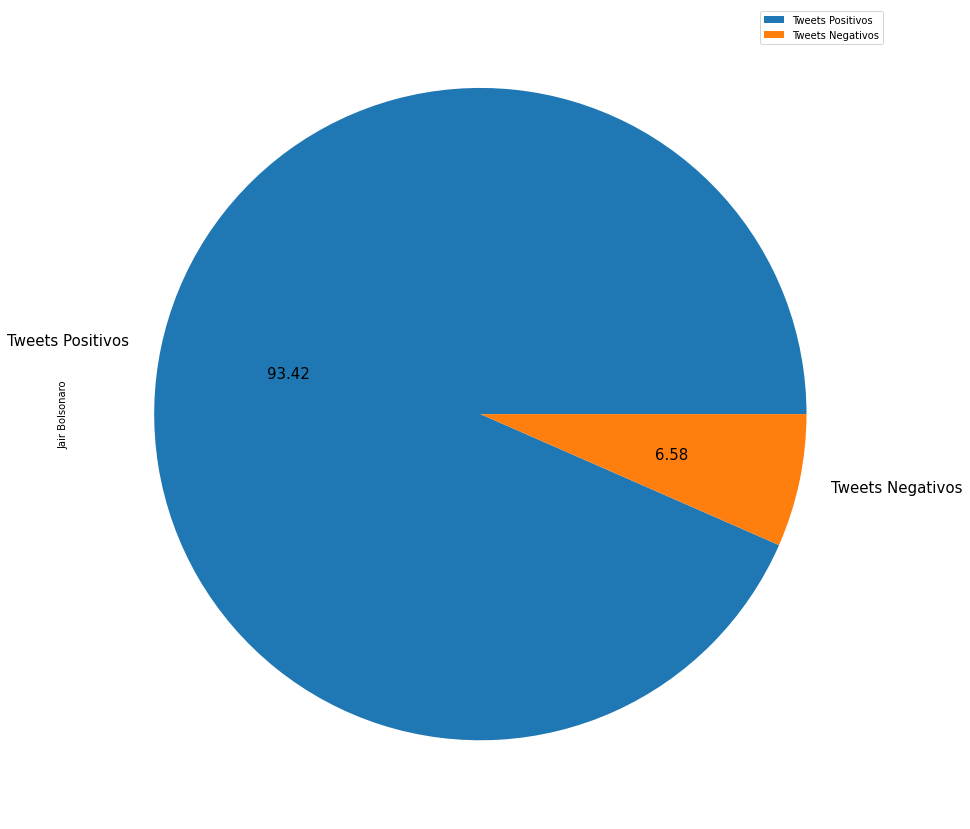

In [11]:
df = pd.DataFrame({'Jair Bolsonaro': [len(posts_comments_pos_tweets), len(posts_comments_neg_tweets)]},
                  index=['Tweets Positivos', 'Tweets Negativos'])
plot = df.plot.pie(subplots=True,autopct='%.2f',fontsize=15, figsize=(15, 15))

In [12]:
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

fig1 = go.Figure([go.Scatter(x=posts_comments['data'], y=posts_comments['angry'], name='Reações Negativas')])
fig1.show()

fig1 = go.Figure([go.Scatter(x=posts_comments['data'], y=posts_comments['likes'], name = 'Reações Positivas')])
fig1.show()


columns_two = ['angry', 'likes']
names = {'angry': 'Reações Negativas',
         'likes': 'Reações Positivas'}

fig = go.Figure([{
    'x': posts_comments['data'],
    'y': posts_comments[col],
    'name': names[col]
}  for col in columns_two])
fig.show(renderer='iframe')

In [13]:
df_before = posts_comments[posts_comments['data'] < '2018-09-01'].copy()
df_before.head()

id                      data  \
1214  211857482296579_671829229862929  2018-08-31T18:22:36+0000   
1215  211857482296579_676723089360200  2018-08-31T11:13:19+0000   
1216  211857482296579_497399267332270  2018-08-31T10:02:53+0000   
1217  211857482296579_228297974509051  2018-08-30T14:40:59+0000   
1218  211857482296579_903442709866212  2018-08-30T12:01:18+0000   

                                               mensagem  likes  angry  shares  
1214  - Chegada no Aeroporto de Porto Velho - Rond\u...  59801    259   33583  
1215  - Aeroporto Salgado Filho. \n- Porto Alegre, 2...  22673     18   20603  
1216  - Obrigado pela considera\u00e7\u00e3o mulhere...  25632     15    8068  
1217  - a invers\u00e3o de valores e o politicamente...  20461    598   12786  
1218  - Jornal O Globo de hoje, 30/08/2018,  diz que...  57960   2823   57047

In [14]:
df_after = posts_comments[posts_comments['data'] >= '2018-09-01'].copy()
df_after.tail()

id                      data  \
1209  211857482296579_1850661045013730  2018-09-03T08:14:18+0000   
1210  211857482296579_2053595561347024  2018-09-01T22:49:50+0000   
1211   211857482296579_337520606990975  2018-09-01T19:07:55+0000   
1212  211857482296579_1015053668695757  2018-09-01T12:10:41+0000   
1213  211857482296579_2135117230148766  2018-09-01T02:51:09+0000   

                                               mensagem  likes  angry  shares  
1209  - Relembrando, um bate papo bacana com a jorna...  32147     28    8863  
1210  - Em Rio Branco/AC, ao lado de \u00edndios, um...  23555     20    5780  
1211  - 01 de setembro de 2018 - Chegada no Aeroport...  21891     13    7194  
1212  - Entrevista onde tratamos de assuntos referen...  25899     26   10308  
1213  - S\u00e1bado, 01/setembro \u00e1s  12hs, pous...  21076     16    2853

In [15]:
def clean_df(df_clean):
    remove_names = False # if True, assumes you have a nomes.txt file with common brazilian names in your current dir
    remove_usernames = False
    
    # Copy the original text for later metadata
    df_clean['original_mensagem'] = df_clean['mensagem'].copy
    
    # Lower case
    df_clean['mensagem'] = df_clean['mensagem'].apply(lambda x: " ".join(str(x).lower() for x in str(x).split()))
    
    # Remove usernames
    if remove_usernames:
         df_clean['mensagem'] = df_clean['mensagem'].str.replace('@[^\s]+', "")
            
    # Remove links
    df_clean['mensagem'] = df_clean['mensagem'].str.replace('https?:\/\/.*[\r\n]*', '')
    
    # Remove punctuation
    df_clean['mensagem'] = df_clean['mensagem'].str.replace('[^\w\s]', '')
    
    # Remove stopwords
    from nltk.corpus import stopwords
    stop = stopwords.words('portuguese')
    df_clean['mensagem'] = df_clean['mensagem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    # Remove common brazilian names
    if remove_names:
        nomes = pd.read_csv('nomes.txt', encoding='latin', header=None)
        lista_nomes = (nomes[0].str.lower()).tolist()
        df_clean['text'] = df_clean['text'].apply(lambda x: " ".join(
            x for x in x.split() if x not in lista_nomes))

    # Remove numbers
    df_clean['mensagem'] = df_clean['mensagem'].str.replace(
        '\d+', '')

    # Remove words with 1-3 chars
    df_clean['mensagem'] = df_clean['mensagem'].str.replace(r'\b(\w{1,3})\b', '')

    # Replace accents and ç
    df_clean.mensagem = df_clean.mensagem.str.normalize('NFKD')\
        .str.encode('ascii', errors='ignore')\
        .str.decode('utf-8')
    
    return df_clean

In [16]:
df_before = clean_df(df_before)
df_before.head()

id                      data  \
1214  211857482296579_671829229862929  2018-08-31T18:22:36+0000   
1215  211857482296579_676723089360200  2018-08-31T11:13:19+0000   
1216  211857482296579_497399267332270  2018-08-31T10:02:53+0000   
1217  211857482296579_228297974509051  2018-08-30T14:40:59+0000   
1218  211857482296579_903442709866212  2018-08-30T12:01:18+0000   

                                               mensagem  likes  angry  shares  \
1214  chegada aeroporto porto velho rondufniann link...  59801    259   33583   
1215  aeroporto salgado filho  porto alegre agoston ...  22673     18   20603   
1216  obrigado consideraueueo mulheres gaufachas udd...  25632     15    8068   
1217  inversueo valores politicamente correto implem...  20461    598   12786   
1218  jornal globo hoje   informaueueo sobre livro s...  57960   2823   57047   

                                      original_mensagem  
1214  <bound method NDFrame.copy of 1214    chegada ...  
1215  <bound method NDFrame.copy of 1214    chegada ...  
1216  <bound method NDFrame.copy of 1214    chegada ...  
1217  <bound method NDFrame.copy of 1214    chegada ...  
1218  <bound method NDFrame.copy of 1214    chegada ...

In [17]:
df_after = clean_df(df_after)
df_after.head()

id                      data  \
0  211857482296579_1826486634166981  2020-03-22T18:47:55+0000   
1  211857482296579_1826339070848404  2020-03-22T16:30:39+0000   
2  211857482296579_1826130007535977  2020-03-22T13:37:26+0000   
3  211857482296579_1825937284221916  2020-03-22T11:07:01+0000   
4  211857482296579_1825422034273441  2020-03-22T02:06:48+0000   

                                            mensagem   likes  angry  shares  \
0  agora vueddeoconferueancia presidente jair bol...  129465    112   23151   
1  inscriueufes seleueueo  profissionais atuaueue...   52238     43    5703   
2  ministuerio saufade ministro mandetta reuniueo...   97986     65   11818   
3  governo federal distribui milhufes testes ruep...  165539     68   39284   
4  chama precauueueo medicamento  barato caso ven...  162513    509   27236   

                                   original_mensagem  
0  <bound method NDFrame.copy of 0       agora vu...  
1  <bound method NDFrame.copy of 0       agora vu...  
2  <bound method NDFrame.copy of 0       agora vu...  
3  <bound method NDFrame.copy of 0       agora vu...  
4  <bound method NDFrame.copy of 0       agora vu...

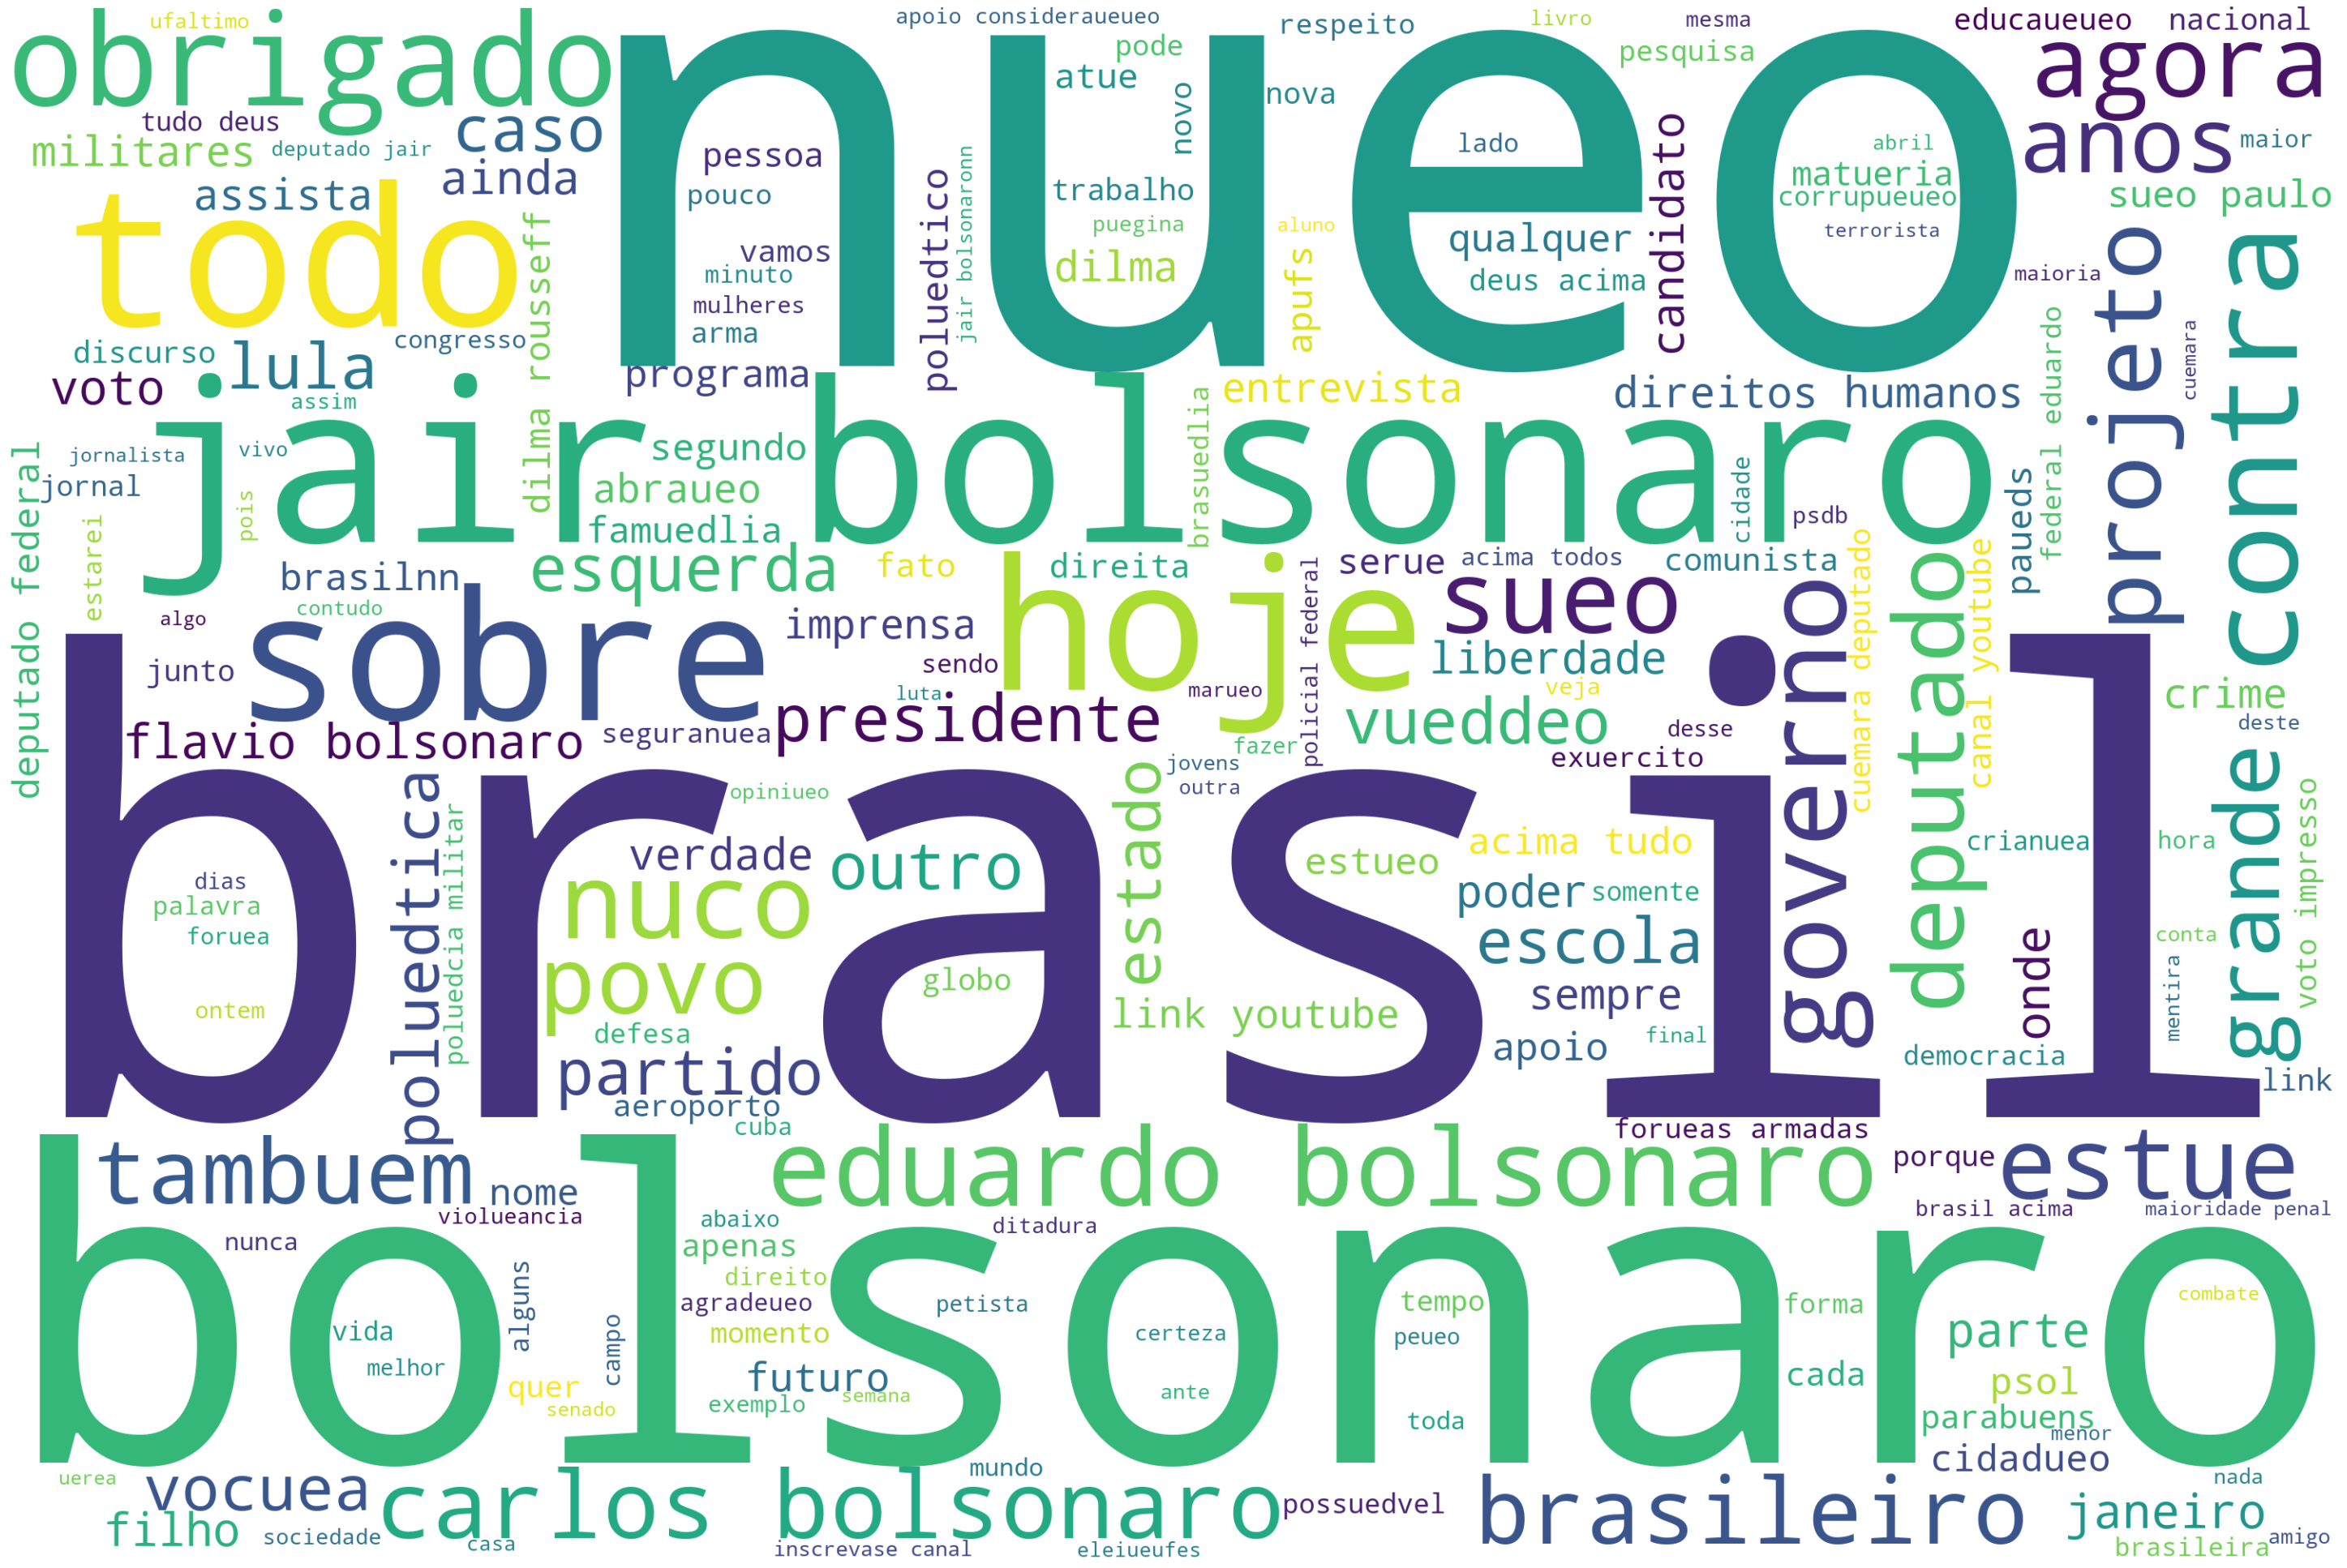

In [18]:
text = " ".join(review for review in df_before.mensagem)
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='white').generate(text)
fig = plt.figure(
    figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

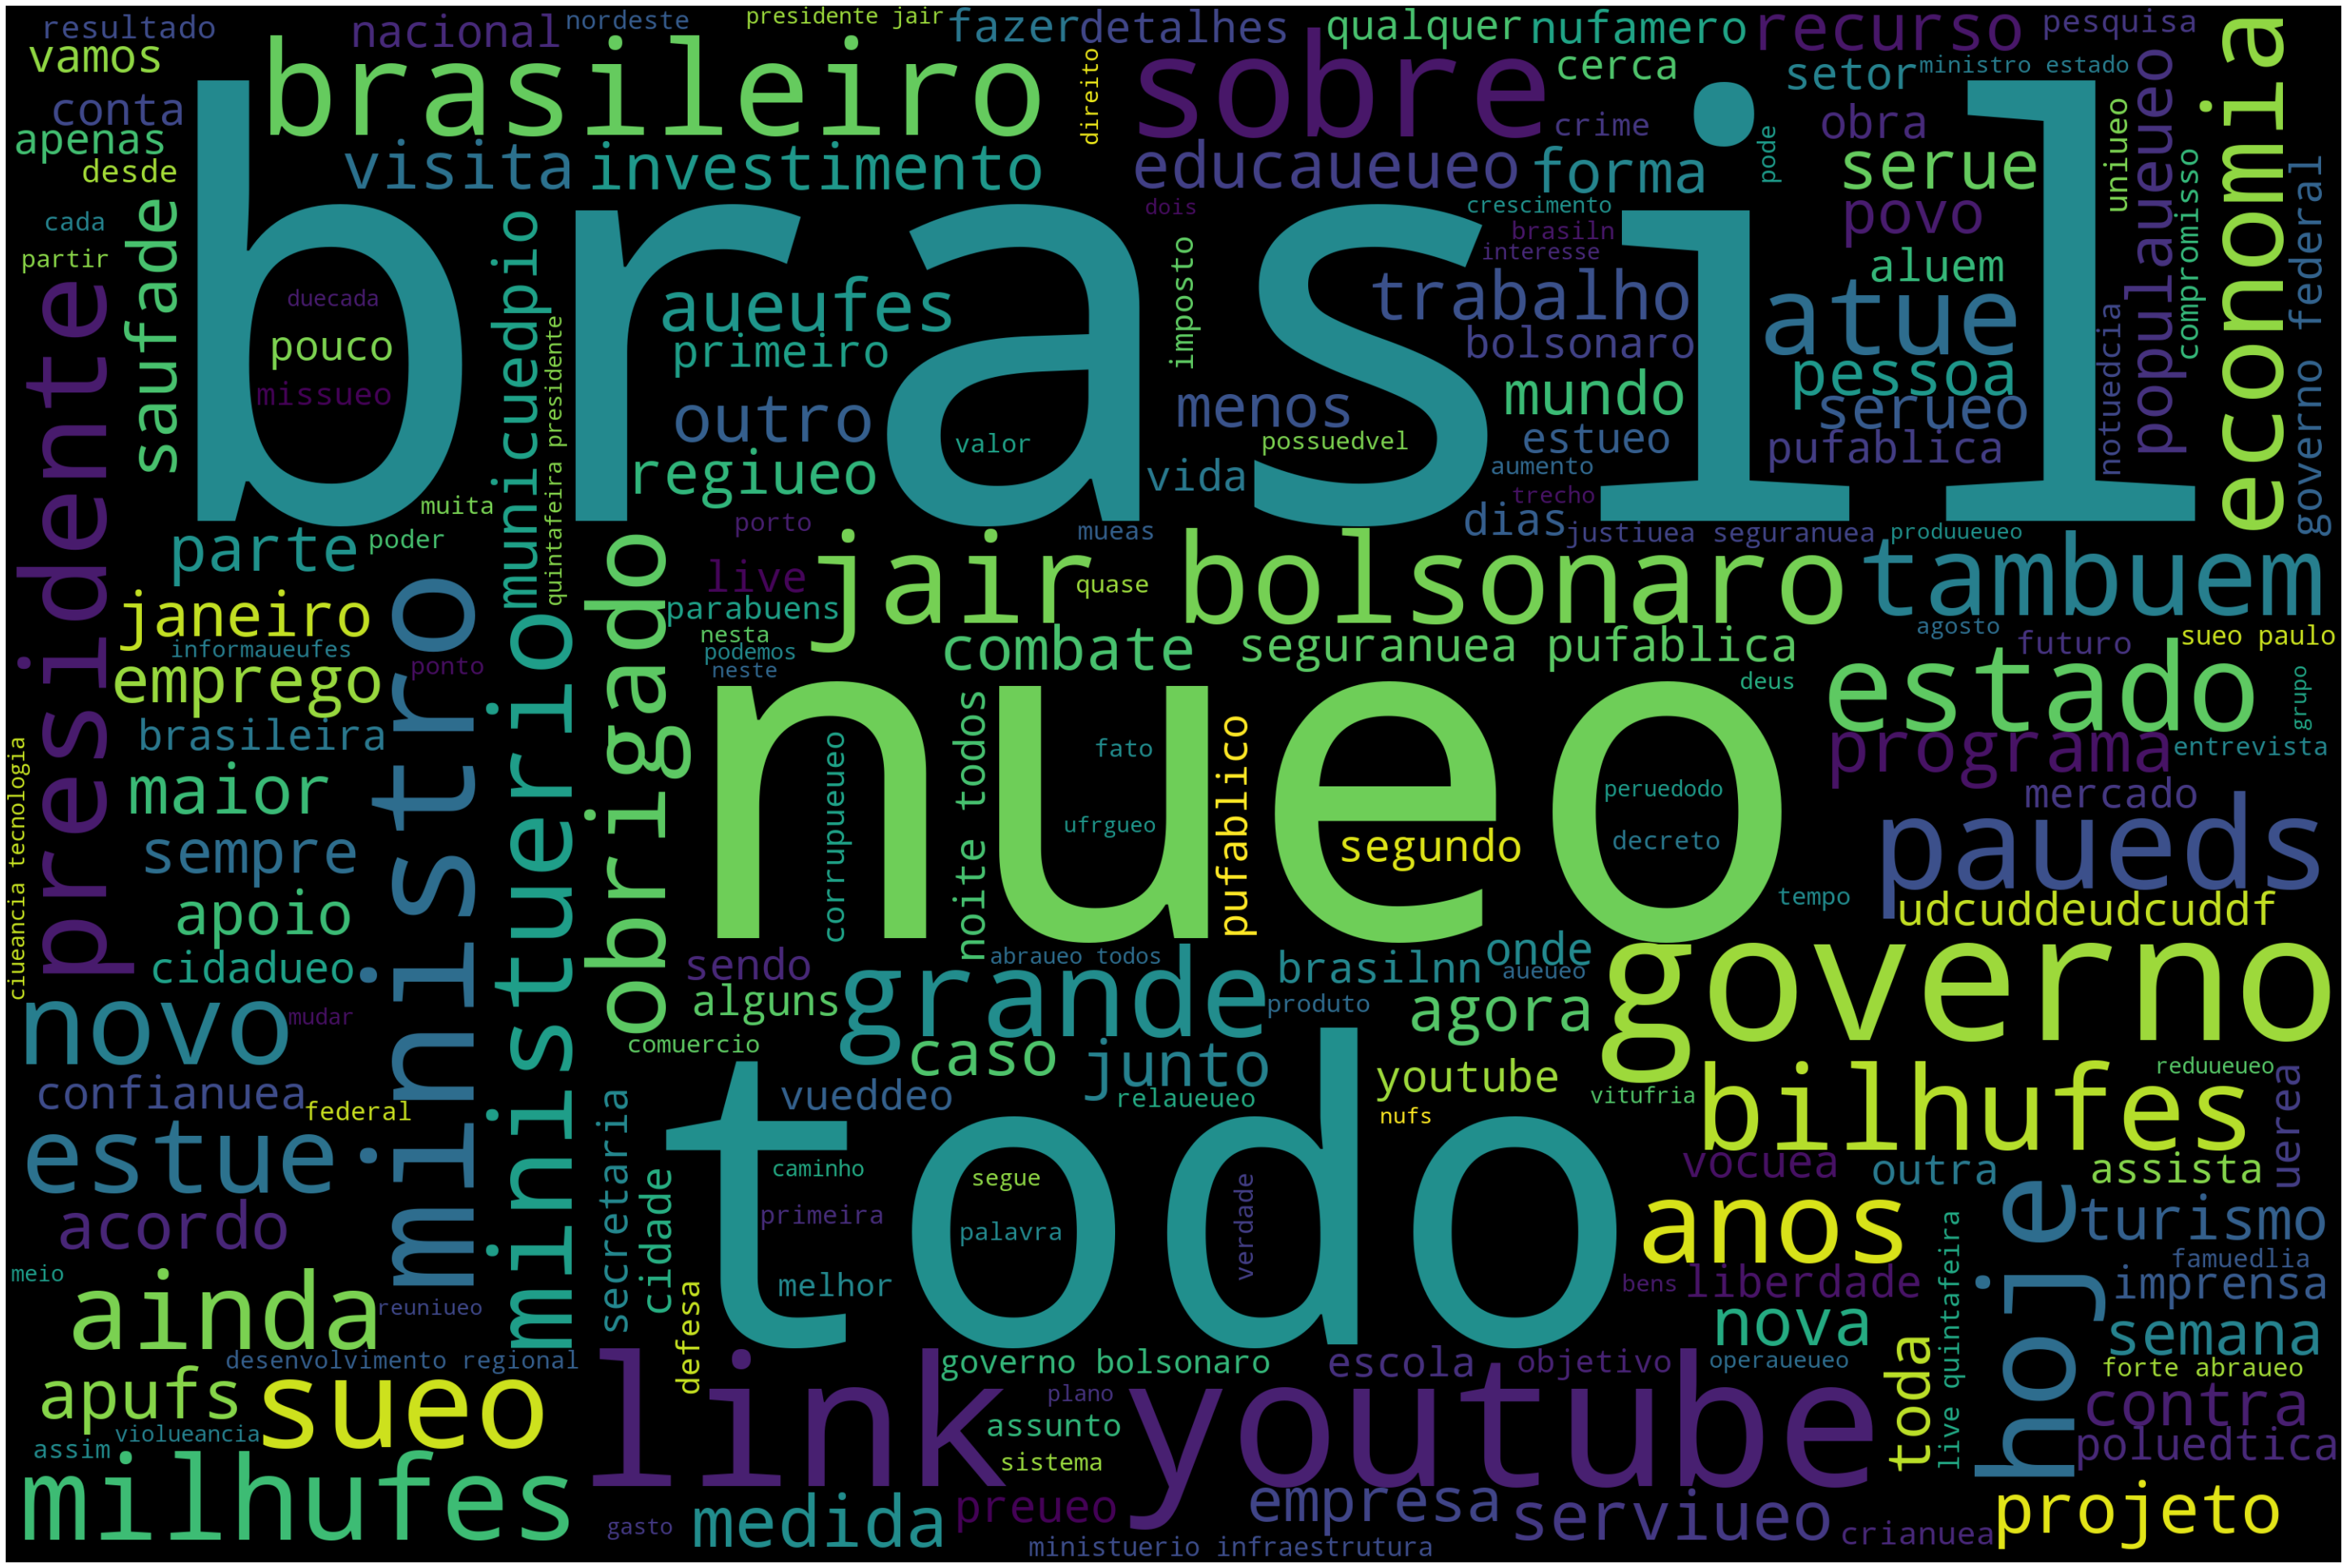

In [19]:
text = " ".join(review for review in df_after.mensagem)
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black').generate(text)
fig = plt.figure(
    figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Eventos de 2018

    [GRUPO - 1/18]
        [08/07/18] - Lua Llivre? Lula Preso?
        [31/08/18] - Início oficial da campanha eleitoral
        [06/09/18] - Ataque a bolsonaro: afetou a disputa presidencial?
    [GRUPO - 2/18]
        [14/11/18] - Mais médicos: a ação de cuba de retirar médicos do país
        [19/12/18] - O ex-assessor de flávio bolsonaro


In [20]:
df_eventos_2018_grupo1 = posts_comments[posts_comments['data'] < '2018-09-30'].copy()
df_eventos_2018_grupo1 = df_eventos_2018_grupo1[df_eventos_2018_grupo1['data'] > '2018-07-01'].copy()
df_eventos_2018_grupo1_after = posts_comments[posts_comments['data'] >= '2018-09-31'].copy()
df_eventos_2018_grupo1_before = posts_comments[posts_comments['data'] < '2018-07-01'].copy()
df_eventos_2018_grupo1_after.tail()
df_eventos_2018_grupo1_before.head()

id                      data  \
1340  211857482296579_1104880252994293  2018-06-30T17:46:43+0000   
1341  211857482296579_1102633673218951  2018-06-28T16:21:00+0000   
1342  211857482296579_1102496239899361  2018-06-28T14:54:43+0000   
1343  211857482296579_1102249553257363  2018-06-28T11:20:28+0000   
1344  211857482296579_1101579249991060  2018-06-28T09:30:17+0000   

                                               mensagem  likes  angry  shares  
1340  - Boris Casoy, RedeTV, e nossa passagem passag...  20244     21    7093  
1341  - Fortaleza/CE, 28/junho/2018.\n- Obrigado meu...  32827     43   19329  
1342  Agora, Fortaleza Cear\u00e1- recep\u00e7\u00e3...  31382    147   15152  
1343  - Tenente Santini da PMESP, diz como quebrar o...  11094      7    5617  
1344  - Reservistas do Ex\u00e9rcito. \n- Recordar \...   8883      8    1842

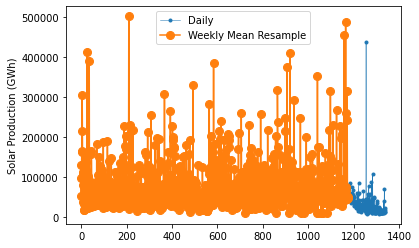

In [30]:
# Start and end of the date range to extract
start, end = '2018-07-01', '2018-09-30'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

ax.plot(df_eventos_2018_grupo1['likes'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_eventos_2018_grupo1_after['likes'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
#ax.plot(df_eventos_2018_grupo1_before['likes'], marker='O', markersize=8, linestyle='-', label='Weekly Mean Resample')


ax.set_ylabel('Comparação de likes durante, antes e depois')
ax.legend();

# columns_two = ['angry', 'likes']
# names = {'angry': 'Reações Negativas',
#          'likes': 'Reações Positivas'}

# fig = go.Figure([{
#     'x': posts_comments['data'],
#     'y': posts_comments[col],
#     'name': names[col]
# }  for col in columns_two])
# fig.show(renderer='iframe')